# Alura - Imersão Dados

<img src="https://i.imgur.com/YQo3qmA.png" alt="Alt text that describes the graphic" title="Title text" />

Esse notebook faz parte do desafio Imersão Dados proposto pela [Alura](https://www.alura.com.br/)!

Aqui, analiso os microdados do exame do ENEM 2019 através de gráficos gerados pelas bibliotecas de análise de dados do Python e de insights criados por conhecimentos gerais, pelas aulas propostas pelo time de professores da Alura e pelas discussões realizadas no servidor do desafio.

## ENEM - Exame Nacional do Ensino Médio

O Exame Nacional do Ensino Médio (Enem) é uma prova realizada pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (INEP), autarquia vinculada ao Ministério da Educação do Brasil, e foi criada em 1998. Ela é utilizada para avaliar a qualidade do ensino médio no país. Seu resultado serve para acesso ao ensino superior em universidades públicas brasileiras, através do Sistema de Seleção Unificada (SiSU), assim como em algumas universidades no exterior.

[Segundo o MEC](https://g1.globo.com/educacao/enem/2019/noticia/2019/11/10/enem-2019-tem-menor-taxa-de-abstencao-da-historia-diz-ministerio.ghtml), mais de 5,1 milhões de pessoas se inscreveram para as provas de 2019. O nível de abstenção foi um dos menores da história do ENEM. No primeiro dia de provas, apenas 23,1% dos alunos faltaram. No segundo dia, esse número foi de 27,2%.

Nosso conjunto de dados possui mais de 130 características diferentes sobre 127380 estudantes (cerca de 2,5% do total).

***

## Carregamento das bibliotecas e dos dados

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

pd.set_option('display.max_columns', None)

plt.style.use('ggplot')

In [2]:
fonte_coords_munic = 'https://github.com/kelvins/Municipios-Brasileiros/blob/main/csv/municipios.csv?raw=true'
coords = pd.read_csv(fonte_coords_munic)

fonte_dados_enem = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv(fonte_dados_enem)

dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506138,Redenção,15,PA,1,1,1,1,506.0,509.0,514.0,517.0,435.6,512.3,488.6,432.4,DACDDEDEDAADCBCBDBDBBBDCCACDECADCCCBCBACCCCEA,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504208,Marabá,15,PA,0,1,1,0,NaN,508.0,512.0,NaN,NaN,409.3,375.3,NaN,NaN,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,503.0,508.0,512.0,515.0,423.2,499.1,441.0,427.2,DDEACAECCC*BCDBAACDACCBAEBBCEEEAECABBCECBBEAA,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,19000100473

In [3]:
print(f'O dataset possui {dados.shape[0]} linhas e {dados.shape[1]} colunas.')

O dataset possui 127380 linhas e 136 colunas.


***

## Análise dos dados dos participantes

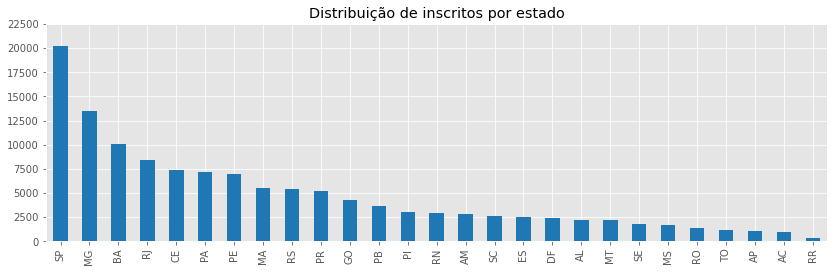

In [4]:
plt.figure(figsize=(14, 4))
dados['SG_UF_RESIDENCIA'].value_counts().sort_values(ascending=False).plot(kind='bar', color = 'tab:blue')
plt.title('Distribuição de inscritos por estado')
plt.ylim(0, 22500);

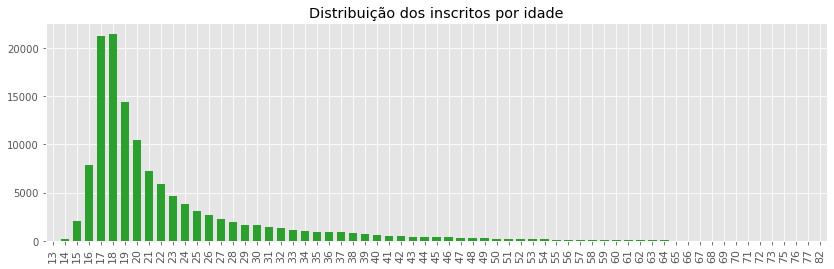

In [5]:
plt.figure(figsize=(14, 4))
dados['NU_IDADE'].value_counts().sort_index(ascending=True).plot(kind='bar', width=0.7, color = 'tab:green')
plt.title('Distribuição dos inscritos por idade')
plt.xticks(fontsize=11);

Nossa análise começa com uma simples verificação da distribuição de inscritos por estado e por idade.
- __São Paulo, Minas Gerais, Bahia  e Rio de Janeiro são os quatro estados com o maior número de inscritos__. Esse é um comportamento esperado visto que esses estados são os mais populosos do Brasil.
- É interessante notar que apesar de ser o quinto mais populoso, o estado do Paraná é apenas o décimo em número de inscritos.
- Grande parte do número de alunos encontra-se na __faixa dos 16 aos 20 anos__, idade em que estão terminando o Ensino Médio e tentando ingressar em uma faculdade.
- Existem também alguns pontos fora da curva, como alguns inscritos com 13 anos e outros com mais de 80!

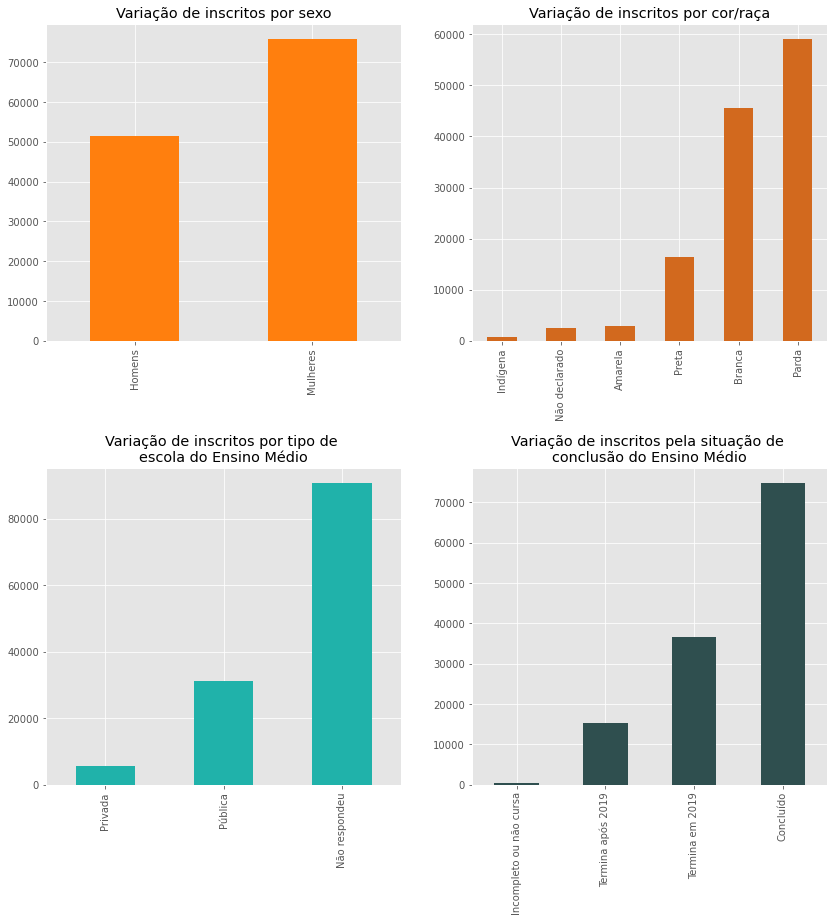

In [283]:
fig, axes = plt.subplots(2, 2, figsize=(14,14))
plt.subplots_adjust(hspace = 0.4)

dados['TP_SEXO'].replace(['F','M'],['Mulheres','Homens']).value_counts().sort_index(ascending=True).plot(
    kind='bar', color = 'tab:orange', ax=axes[0,0])

axes[0,0].set_title('Variação de inscritos por sexo')

dados['TP_COR_RACA'].replace([0, 1, 2, 3, 4, 5], ['Não declarado','Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
                            ).value_counts().sort_values(ascending=True).plot(kind='bar', color = 'chocolate',
                                                                              ax=axes[0,1])

axes[0,1].set_title('Variação de inscritos por cor/raça')

dados['TP_ESCOLA'].replace([1, 2, 3, 4], ['Não respondeu', 'Pública', 'Privada', 'Exterior']
                            ).value_counts().sort_values(ascending=True).plot(kind='bar', color = 'lightseagreen', 
                                                                              ax=axes[1,0])

axes[1,0].set_title('Variação de inscritos por tipo de \nescola do Ensino Médio')

dados['TP_ST_CONCLUSAO'].replace([1, 2, 3, 4], ['Concluído','Termina em 2019','Termina após 2019',
                                                'Incompleto ou não cursa']).value_counts()\
                                                .sort_values(ascending=True).plot(kind='bar', color = 'darkslategrey',
                                                                                  ax=axes[1,1])

axes[1,1].set_title('Variação de inscritos pela situação de \nconclusão do Ensino Médio')

plt.show()

Esses quatro gráficos mostram algumas variações no número de inscritos com base em dados demográficos do nosso país.
- __59,6% dos inscritos são mulheres, enquanto 40,3% dos inscritos são homens__. Visto que, segundo o [IBGE](https://educa.ibge.gov.br/jovens/conheca-o-brasil/populacao/18318-piramide-etaria.html), na faixa etária média de alunos do ENEM a quantidade de homens é levemente maior do que a de mulheres, esse dado é bastante interessante e pode ser analisado futuramente com mais detalhes.
- A maioria dos inscritos são pardos e brancos, o que confere com a média da população brasileira apontada pelos censos.
- Infelizmente __mais de 70% dos inscritos não responderam se estudam ou estudaram em escola pública ou privada no Ensino Médio__, o que dificulta uma análise mais profunda em relação a esse tema. Isso pode ter ocorrido por diversos motivos, como dúvidas no momento do preenchimento ("devo marcar o tipo de escola que sempre frequentei ou somente durante o Ensino Médio?") ou quaisquer outros. Fora os que não responderam, __24,4% são de escola pública e 4,3% de escola particular__.
- A maioria (58,8%) já havia concluído o Ensino Médio no momento da prova, enquanto outros iriam concluir em 2019 ou após esse ano.

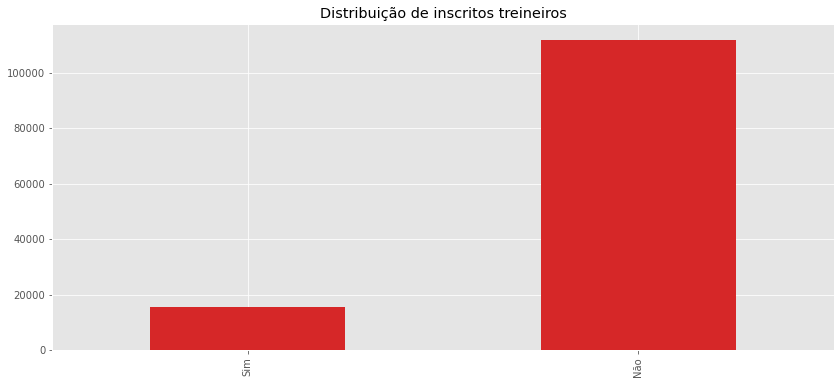

In [7]:
plt.figure(figsize=(14, 6))
dados['IN_TREINEIRO'].replace([0, 1], ['Não', 'Sim']
                            ).value_counts().sort_values(ascending=True).plot(kind='bar', color = 'tab:red')
plt.title('Distribuição de inscritos treineiros');

Todos os anos muitos alunos do Ensino Médio fazem a prova do ENEM como treineiros, para entenderem como funciona o exame, quais assuntos são abordados e qual o nível de ansiedade dos alunos durante a prova.
- Em 2019, __12,1% dos inscritos foram treineiros__!

***

## Presença nas provas

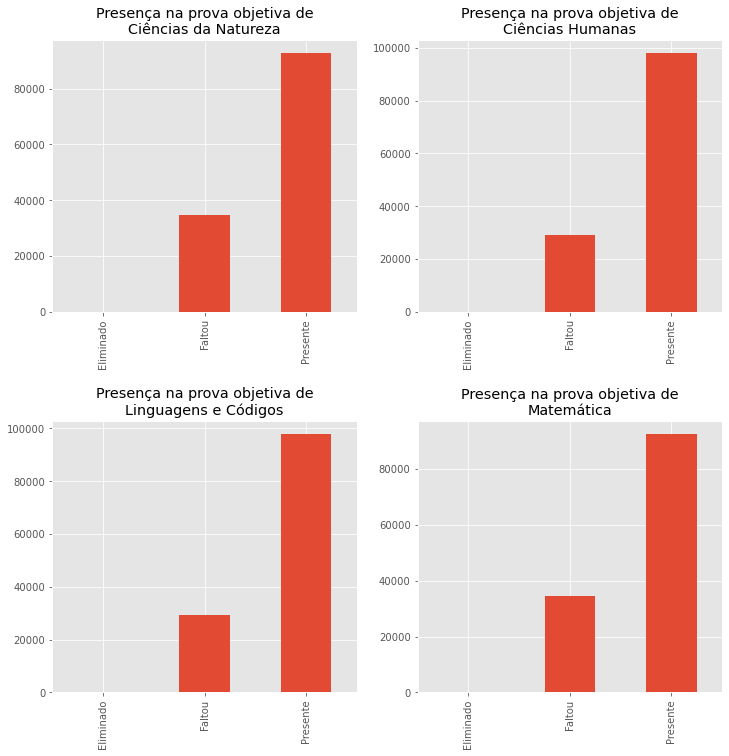

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
plt.subplots_adjust(hspace = 0.4)

dados['TP_PRESENCA_CN'].replace([0, 1, 2], ['Faltou', 'Presente', 'Eliminado']
                            ).value_counts().sort_values(ascending=True).plot(kind='bar', ax=axes[0,0])

axes[0,0].set_title('Presença na prova objetiva de\nCiências da Natureza')

dados['TP_PRESENCA_CH'].replace([0, 1, 2], ['Faltou', 'Presente', 'Eliminado']
                            ).value_counts().sort_values(ascending=True).plot(kind='bar', ax=axes[0,1])

axes[0,1].set_title('Presença na prova objetiva de\nCiências Humanas')

dados['TP_PRESENCA_LC'].replace([0, 1, 2], ['Faltou', 'Presente', 'Eliminado']
                            ).value_counts().sort_values(ascending=True).plot(kind='bar',ax=axes[1,0])

axes[1,0].set_title('Presença na prova objetiva de\nLinguagens e Códigos')

dados['TP_PRESENCA_MT'].replace([0, 1, 2], ['Faltou', 'Presente', 'Eliminado']
                            ).value_counts().sort_values(ascending=True).plot(kind='bar',ax=axes[1,1])

axes[1,1].set_title('Presença na prova objetiva de\nMatemática')

plt.show()

Os gráficos acima refletem o que foi dito no início da análise sobre a abstenção dos alunos na prova. Com os menores índices da história, os inscritos tiveram uma boa presença em todas matérias e nos dois dias de provas, e __menos de 0,1% foram eliminados dos exames__.

***

## Notas das provas

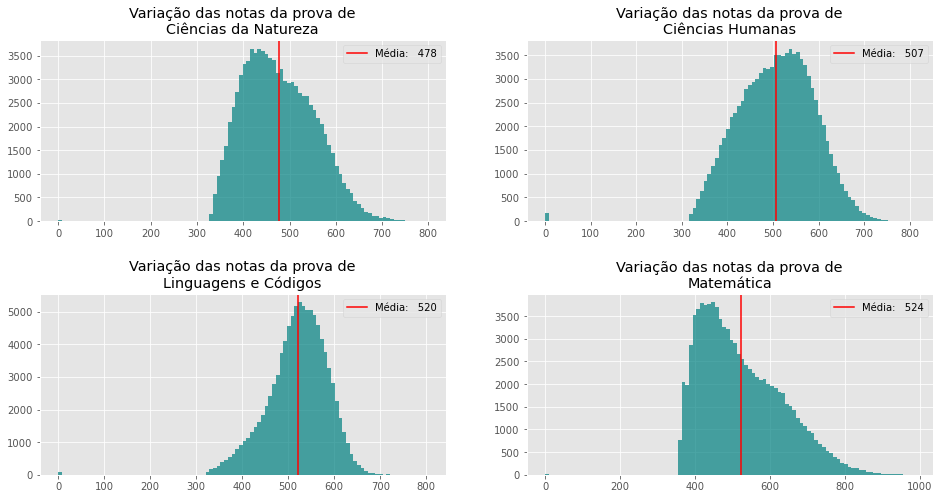

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))
plt.subplots_adjust(hspace = 0.4)

dados['NU_NOTA_CN'].plot(kind='hist', bins=100, color='teal', alpha=0.7, label='_nolegend_', ax=axes[0,0])
axes[0,0].axvline(dados['NU_NOTA_CN'].mean(), color='r', label='Média: {:5.0f}'.format(np.mean(dados['NU_NOTA_CN'])))
axes[0,0].set_title('Variação das notas da prova de\nCiências da Natureza')
axes[0,0].set_ylabel('')
axes[0,0].legend()

dados['NU_NOTA_CH'].plot(kind='hist', bins=100, color='teal', alpha=0.7, label='_nolegend_', ax=axes[0,1])
axes[0,1].axvline(dados['NU_NOTA_CH'].mean(), color='r', label='Média: {:5.0f}'.format(np.mean(dados['NU_NOTA_CH'])))
axes[0,1].set_title('Variação das notas da prova de\nCiências Humanas')
axes[0,1].set_ylabel('')
axes[0,1].legend(loc='upper right')

dados['NU_NOTA_LC'].plot(kind='hist', bins=100, color='teal', alpha=0.7, label='_nolegend_', ax=axes[1,0])
axes[1,0].axvline(dados['NU_NOTA_LC'].mean(), color='r', label='Média: {:5.0f}'.format(np.mean(dados['NU_NOTA_LC'])))
axes[1,0].set_title('Variação das notas da prova de\nLinguagens e Códigos')
axes[1,0].set_ylabel('')
axes[1,0].legend()

dados['NU_NOTA_MT'].plot(kind='hist', bins=100, color='teal', alpha=0.7, label='_nolegend_', ax=axes[1,1])
axes[1,1].axvline(dados['NU_NOTA_MT'].mean(), color='r', label='Média: {:5.0f}'.format(np.mean(dados['NU_NOTA_MT'])))
axes[1,1].set_title('Variação das notas da prova de\nMatemática')
axes[1,1].set_ylabel('')
axes[1,1].legend()
plt.show()

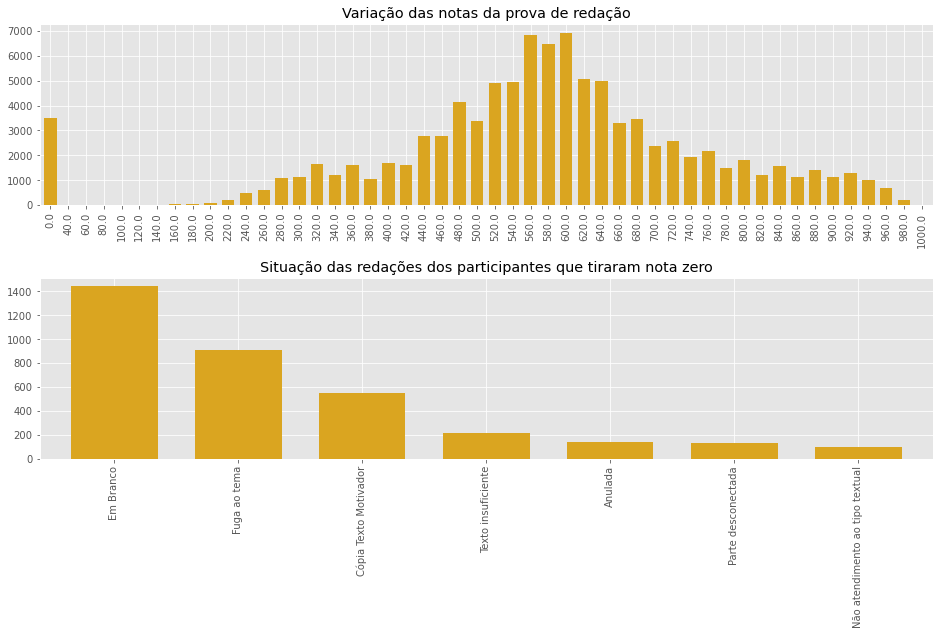

In [288]:
fig, axes = plt.subplots(2, 1, figsize=(16,8))
plt.subplots_adjust(hspace = 0.4)

dados['NU_NOTA_REDACAO'].value_counts().sort_index(ascending=True).plot(kind='bar', width=0.7, color = 'goldenrod',
                                                                        ax=axes[0])
axes[0].set_title('Variação das notas da prova de redação')

dados[dados['TP_STATUS_REDACAO'] != 1]['TP_STATUS_REDACAO'].replace([2, 3, 4, 6, 7, 8, 9],
                                                                    ['Anulada','Cópia Texto Motivador','Em Branco',
                                                                     'Fuga ao tema', 'Não atendimento ao tipo textual',
                                                                     'Texto insuficiente', 'Parte desconectada']
                                                                    ).value_counts().plot(kind='bar', width=0.7, 
                                                                                          color = 'goldenrod', ax=axes[1])
axes[1].set_title('Situação das redações dos participantes que tiraram nota zero')

plt.show()

Como conclusão das análises iniciais, é possível inferir que os alunos geralmente têm __notas melhores em Matemática do que nos outros conteúdos__. Isso é enfatizado por sua __média de 524__, logo acima da média de 520 das provas de Linguagens e Códigos.

Em seguida, Ciências Humanas teve uma média de notas de 507 e Ciência da Natureza teve 478 pontos de média.

É interessante lembrar que geralmente a __Matemática é uma das matérias menos queridas entre os alunos do Ensino Fundamental e Médio__. Então por que os alunos se saem melhor nessa do que nas outras matérias? Será que eles __estudam mais__ para a prova por saberem que possuem mais dificuldade nessa área? Ou será que a prova de Matemática do ENEM acaba sendo __mais fácil__ do que o conteúdo aplicado nas escolas? Uma análise mais profunda nessa ideia seria interessante por parte dos professores!

Por fim, temos as notas das redações. A média de notas dos alunos ficou entre os __560 e os 600 pontos__, porém mais de 3500 zeraram a prova. Desses, __41% deixaram a prova em branco, enquanto 26% fugiram do tema e mais de 15% simplesmente copiaram parte ou todo o texto de apoio à redação__. Quando isso acontece, a prova é automaticamente zerada.

***

## Análises mais detalhadas

Para uma análise mais exata das informações do nosso conjunto de dados vamos criar uma nova coluna com a soma total das notas dos participantes, incluindo a redação, e criar um novo conjunto de dados sem os inscritos que zeraram a prova por completo.

In [11]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)

provas.append('NU_NOTA_TOTAL')

dados_sem_notas_zero = dados.query('NU_NOTA_TOTAL != 0')

No nosso conjunto de dados temos respostas para diversas questões socioeconômicas realizadas pelo INPE no momento da inscrição para a prova. Essas questões trazem informações sobre a escolaridade dos pais, renda familiar, condições de moradia e até meios de locomoção.

Precisamos tomar cuidado quando analisamos essas questões para não sermos tendenciosos ou até mesmo preconceituosos. Além disso, há casos em que o aluno não responde às questões com total veracidade, o que torna ainda mais difícil uma análise concreta desses dados.

Dito isso, vamos criar algumas visualizações (dessa vez utilizando a biblioteca de visualização `seaborn`) e apresentar descrições, nem sempre conclusivas, sobre o que for observado.

In [12]:
def faixa_etaria(dados_sem_notas_zero):
    if dados_sem_notas_zero['NU_IDADE'] < 20:
        return 'Jovens'
    elif dados_sem_notas_zero['NU_IDADE'] > 59:
        return 'Idosos'
    else:
        return 'Adultos'

dados_sem_notas_zero['FAIXA_ETARIA'] = dados.apply(faixa_etaria, axis=1)

C:\Users\rodol\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


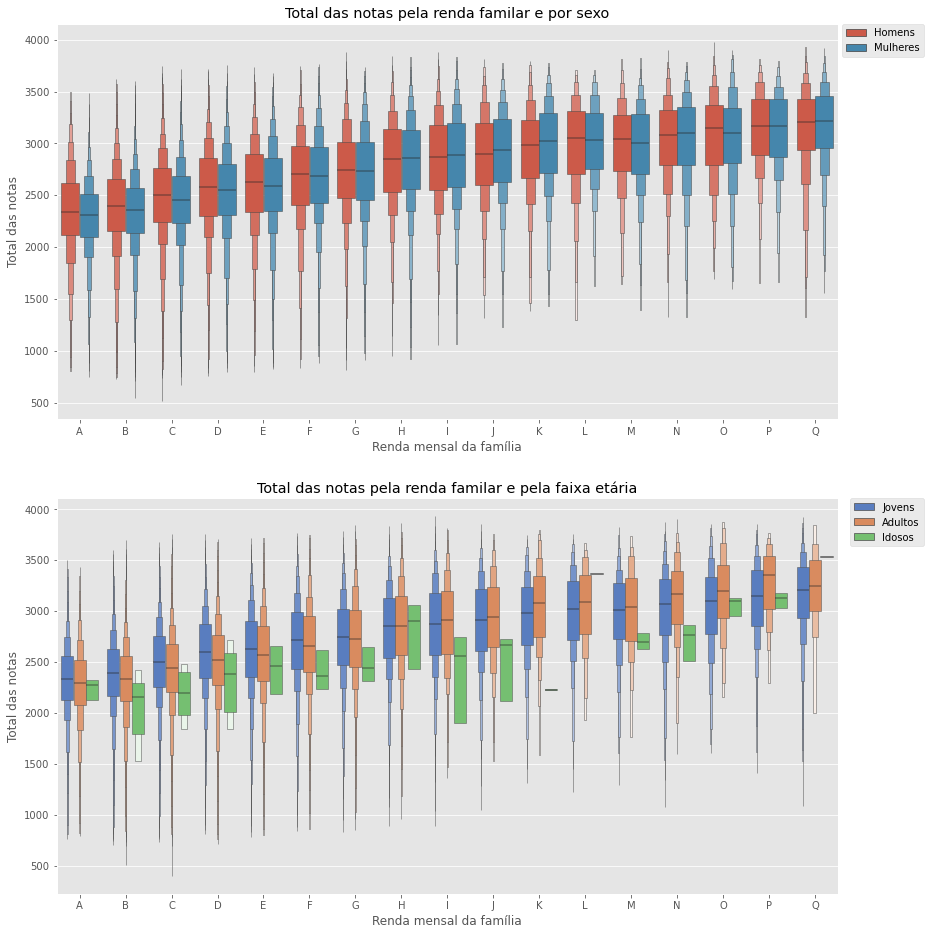

In [292]:
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

fig, axes = plt.subplots(2, 1, figsize=(14,16))

sns.boxenplot(x="Q006", y = "NU_NOTA_TOTAL", hue = dados_sem_notas_zero['TP_SEXO'].replace(['F','M'],['Mulheres','Homens']),
              data = dados_sem_notas_zero, order = renda_ordenada, showfliers=False, ax=axes[0])

axes[0].set_title("Total das notas pela renda familar e por sexo")
axes[0].set_xlabel('Renda mensal da família')
axes[0].set_ylabel('Total das notas')
axes[0].legend(bbox_to_anchor=(1.11, 1),borderaxespad=0);

sns.boxenplot(x="Q006", y = "NU_NOTA_TOTAL", hue = dados_sem_notas_zero['FAIXA_ETARIA'], data = dados_sem_notas_zero, 
              order = renda_ordenada, showfliers=False, palette='muted', ax=axes[1])

axes[1].set_title("Total das notas pela renda familar e pela faixa etária")
axes[1].set_xlabel('Renda mensal da família')
axes[1].set_ylabel('Total das notas')
axes[1].legend(bbox_to_anchor=(1.11, 1),borderaxespad=0);

plt.show()

Com os dois gráficos acima podemos analisar as diferenças entre as notas dos homens e das mulheres com base na sua faixa de renda familiar. O mesmo pode ser feito analisando as faixas etárias e suas rendas.
- É clara a diferença entre as notas dos alunos com base em suas rendas familiares. Infelizmente a __desigualdade na educação brasileira é histórica e estamos longe de uma mudança concreta__.
- Apesar de estarem em maior número, as __mulheres das classes mais baixas costumam tirar notas piores que os homens da mesma classe__. Isso talvez se justifique pelo fato de que essas mulheres geralmente têm menos tempo dedicado aos estudos, visto que precisam cuidar de atividades da casa, cuidar dos filhos e trabalhar, além de sofrerem mais com a desigualdade educacional. Novamente, esse é um assunto complicado e que deve ser analisado com pesquisas antes de tirarmos quaisquer conclusões.
- __Essa diferença entre os gêneros começa a se neutralizar a partir da faixa F__, que consiste numa renda familiar de R\\$ 2.495,01 até R\$ 2.994,00.
- Até a faixa G (R\\$ 2.994,01 até R\$ 3.992,00), __os jovens (19 anos ou menos) costumam ter notas melhores que os adultos__. Dessa faixa em diante a situação começa a se inverter. Os idosos, por sua vez, em grande maioria têm notas piores que as outras faixas de idade, com suas exceções.

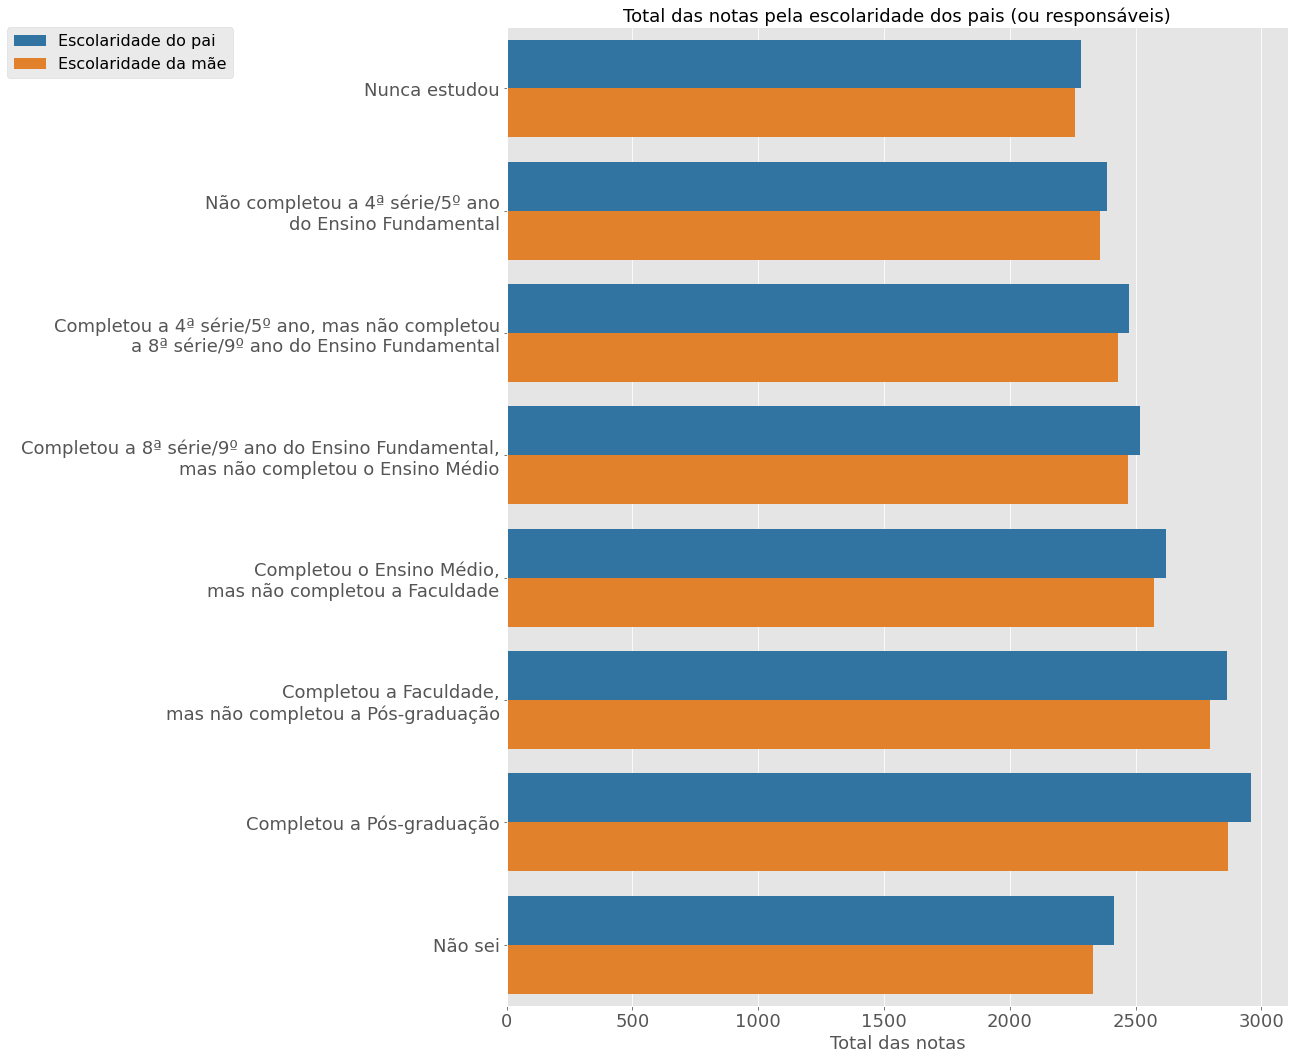

In [14]:
escolar_pai_mae = dados_sem_notas_zero[['Q001','Q002','NU_NOTA_TOTAL']].melt(id_vars='NU_NOTA_TOTAL')

plt.figure(figsize=(14,18))
sns.barplot(x = 'NU_NOTA_TOTAL', y = 'value', hue = 'variable', data = escolar_pai_mae.replace(['Q001','Q002'],
                                                                                               ['Escolaridade do pai',
                                                                                                'Escolaridade da mãe']),
            order = sorted(escolar_pai_mae['value'].unique()), ci=False, palette='tab10')

plt.title('Total das notas pela escolaridade dos pais (ou responsáveis)', size=18)
plt.xlabel('Total das notas', size=18)
plt.ylabel('')
plt.xticks(size=18)
plt.yticks([0,1,2,3,4,5,6,7], ['Nunca estudou', 'Não completou a 4ª série/5º ano\ndo Ensino Fundamental',
                               'Completou a 4ª série/5º ano, mas não completou\na 8ª série/9º ano do Ensino Fundamental',
                               'Completou a 8ª série/9º ano do Ensino Fundamental,\nmas não completou o Ensino Médio',
                               'Completou o Ensino Médio,\nmas não completou a Faculdade',
                               'Completou a Faculdade,\nmas não completou a Pós-graduação',
                               'Completou a Pós-graduação','Não sei'], size=18)
plt.legend(bbox_to_anchor=(-0.35, 1),borderaxespad=0, prop={'size': 16});

O gráfico acima mostra a influência da escolaridade dos pais ou responsáveis nas notas dos inscritos do ENEM.
- É evidente o crescimento das notas dos alunos em relação à escolaridade dos pais.
- Aqueles que têm __pais sem o Ensino Médio completo tiraram uma média total de notas abaixo 2500 pontos__, enquanto os que têm __pais com a Pós-Graduação completa alcançaram uma faixa média de quase 3000 pontos__.
- A escolaridade dos pais ou responsáveis provavelmente está relacionada à renda familiar, o que pode fornecer mais incentivos e recursos aos estudantes para que eles alcançem notas melhores no exame.

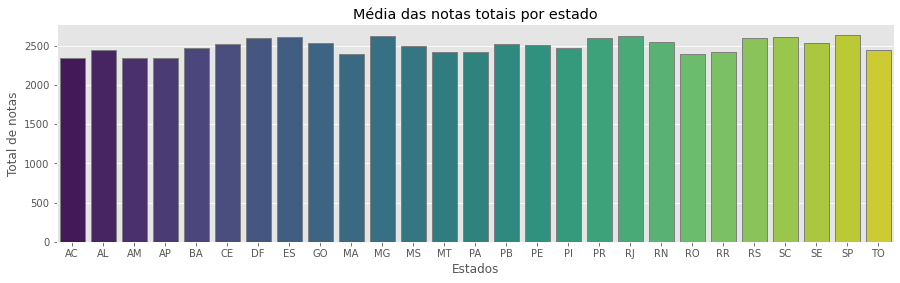

In [293]:
plt.figure(figsize=(15,4))
sns.barplot(x=dados_sem_notas_zero.groupby('SG_UF_RESIDENCIA')['NU_NOTA_TOTAL'].mean().index,
            y=dados_sem_notas_zero.groupby('SG_UF_RESIDENCIA')['NU_NOTA_TOTAL'].mean().values, palette='viridis',
            linewidth=1, edgecolor='gray')

plt.title('Média das notas totais por estado')
plt.xlabel('Estados')
plt.ylabel('Total de notas');

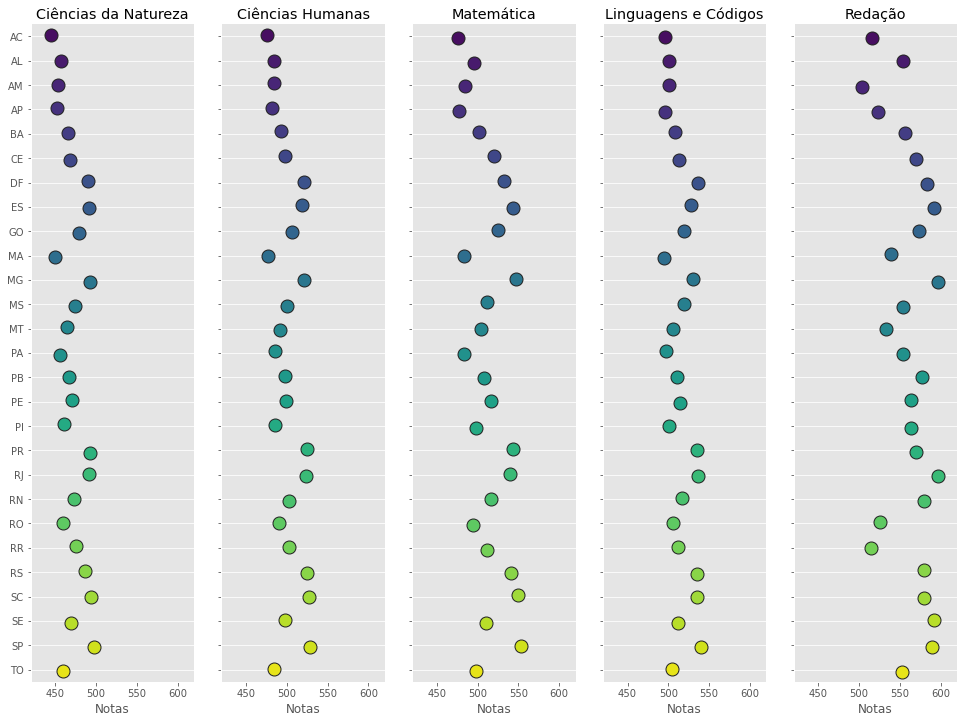

In [123]:
notas_estados = dados_sem_notas_zero.groupby('SG_UF_RESIDENCIA')[['SG_UF_RESIDENCIA','NU_NOTA_CN','NU_NOTA_CH',
                                                                  'NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']
                                                                ].mean().reset_index()

g = sns.PairGrid(notas_estados, x_vars=notas_estados.columns[1:], y_vars=['SG_UF_RESIDENCIA'], height=10, aspect=.28)

g.map(sns.stripplot, size=13, orient='h', palette='viridis', linewidth=1, edgecolor='gray')

g.set(xlim=(420, 620), xlabel='Notas', ylabel='')

titles = ['Ciências da Natureza','Ciências Humanas','Matemática','Linguagens e Códigos','Redação']

for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

Os gráficos de barras e pontos acima nos mostram as médias das notas atingidas pelos estudantes em cada prova, incluindo a Redação, por estado da residência, além da média total.
- Existe um __leve aumento na média das notas para os estudantes das escolas do Sul e do Sudeste__.
- Estudantes do __Distrito Federal também possuem notas altas__, principalmente nas provas de __Linguagens e Códigos e na Redação__.
- __O norte possui as piores notas do exame__. Isso é um reflexo da dificuldade do ensino nessa região, visto que muitos alunos não têm acesso à escolas, sofrem com falta de material, dificuldades de acesso e não conseguem completar seus estudos. Essa dificuldade se agravou ainda mais com a pandemia, já que muito não têm um computador nem mesmo Internet em suas casas.
- __O Rio Grande do Norte lidera o ranking de notas dos estados do Norte e Nordeste__, com uma média total acima do 2500 pontos.

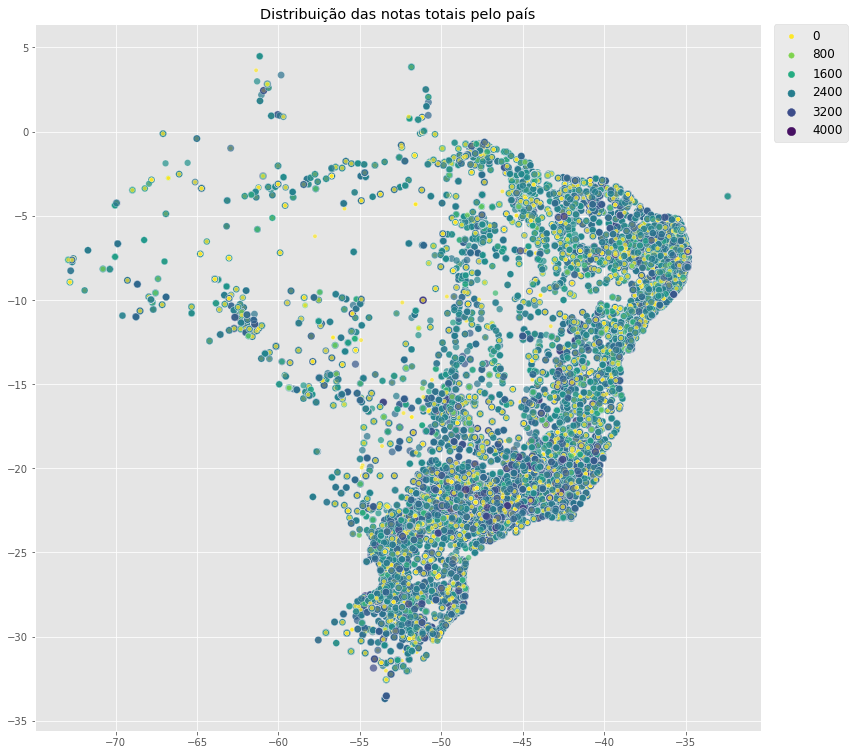

In [294]:
dados_coords = dados.merge(coords[['codigo_ibge','latitude','longitude','capital']], 
                                          left_on='CO_MUNICIPIO_RESIDENCIA', right_on='codigo_ibge', how='left')

plt.figure(figsize=(13,13))
sns.scatterplot(x="longitude", y="latitude", data=dados_coords, hue='NU_NOTA_TOTAL',size='NU_NOTA_TOTAL',alpha=0.7, 
                palette='viridis_r')

plt.title('Distribuição das notas totais pelo país')
plt.xlabel('')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.12, 1),borderaxespad=0, prop={'size': 12});

O mapa acima nos mostra uma distribuição das notas totais ao redor do Brasil e também nos dá uma ideia da quantidade de inscritos em cada região. Aqui fica evidente a __diminuição do número de alunos da região Norte e sua baixa pontuação média__ nas provas. Por contraste, o __Sul e o Sudeste lideram o ranking de número de inscritos e notas médias__, como dito anteriormente.

Além dessas existem diversas outras maneiras de analisarmos os dados da educação brasileira e das notas dos alunos no ENEM. Esse é um assunto delicado que merece total atenção tanto do Governo quanto de todos os órgãos responsáveis pela educação, além de uma atenção especial da população, com cobranças constantes por resultados.

<img src="https://i.imgur.com/ibqvCIi.jpg" />